<a href="https://colab.research.google.com/github/losornom-spec/POO-2025-2/blob/main/Actividad_6_POO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# @title
import base64
from IPython.display import display, HTML

with open("logo.png", "rb") as image_file:
    encoded_image = base64.b64encode(image_file.read()).decode()

html_code = f"""
<style>
  @page {{
    size: A4;
    margin: 0;
  }}
  body, html {{
    margin: 0;
    padding: 0;
    height: 100%;
    width: 100%;
  }}

  .cover {{
    height: 50cm;
    width: 100%;
    box-sizing: border-box;
    font-family: Arial, sans-serif;
    text-align: center;
    display: flex;
    flex-direction: column;
    justify-content: space-between;
    padding-top: 3cm;
    padding-bottom: 3cm;
  }}

  .section {{
    max-width: 17cm;
    margin-left: auto;
    margin-right: auto;
  }}

  .cover img {{
    width: 120px;
    margin-bottom: 20px;
  }}

  h1 {{
    font-size: 24pt;
    margin: 10px 0;
  }}

  h2 {{
    font-size: 20pt;
    margin: 10px 0;
  }}

  h3 {{
    font-size: 16pt;
    margin: 5px 0;
  }}

  p {{
    line-height: 1.6;
    font-size: 12pt;
    margin: 5px 0;
  }}
</style>

<div class="cover">
  <div class="section">
    <img src="data:image/png;base64,{encoded_image}" alt="Logo UNAL">
    <h1>UNIVERSIDAD NACIONAL DE COLOMBIA</h1>
    <h3>PREGRADO EN ESTADÍSTICA</h3>
    <p>Departamento de Estadística<br>Facultad de Ciencias</p>
  </div>

  <div class="section">
    <h2>Programación orientada a objetos</h2>
    <h3><i>Actividad 6</i></h3>
  </div>

  <div class="section">
    <p><strong>Estudiantes:</strong><br>
    Luis Gabriel Osorno Muñoz – C.C. 1040976099<br>
    losornom@unal.edu.co</p>
  </div>

  <div class="section">
    <p><strong>Medellín, Colombia</strong><br>
    <strong>Diciembre 09 de 2025</strong></p>
  </div>
</div>
"""

display(HTML(html_code))

# Ejercicio Enunciado: Nómina
## Cuadros de diálogo. Ejercicio 8.4 página 517


Se desea desarrollar un programa utilizando una interfaz gráfica de usuario que calcule la nómina de empleados de una empresa. Para ello, el programa debe contar con una barra de menús con los siguientes ítems:

-  Agregar empleado: genera una ventana donde se deben ingresar los datos de un empleado:

    * Nombre de tipo String.

    * Apellidos de tipo String.

    * Cargo, el cual puede ser directivo, estratégico u operativo, se puede implementar con un JList.

    * Género, el cual puede ser masculino o femenino, se puede implementar con un JCheckBox.

    * Salario por día de tipo double.

    * Días trabajados al mes desde 1 a 31, se puede implementar con un JSpinner.

    * Otros ingresos de tipo double.

    * Pagos por salud de tipo double.

    * Aporte pensiones de tipo double.

- Calcular nómina: genera una ventana donde se muestra en formato tabla los datos de los empleados ingresados. Cada fila de la tabla corresponde a un empleado. En las columnas se mostrarán los nombres, apellidos y sueldo de cada empleado. El sueldo de cada empleado se calcula como: $$\text{Salario mensual} = (\text{días trabajados} * \text{sueldo por día}) + \text{otros ingresos} - \text{pagos por salud} - \text{aporte pensiones}$$ En la parte inferior de la ventana, se calcula el total de la nómina
de la empresa, calculada como la suma de los salarios mensuales de cada empleado.

- Guardar archivo: solicita una carpeta donde se va a generar un archivo de texto denominado “Nómina.txt” con los datos ingresados por cada empleado, su sueldo mensual calculado y el total de la nómina de la empresa.

# Diagrama de clases

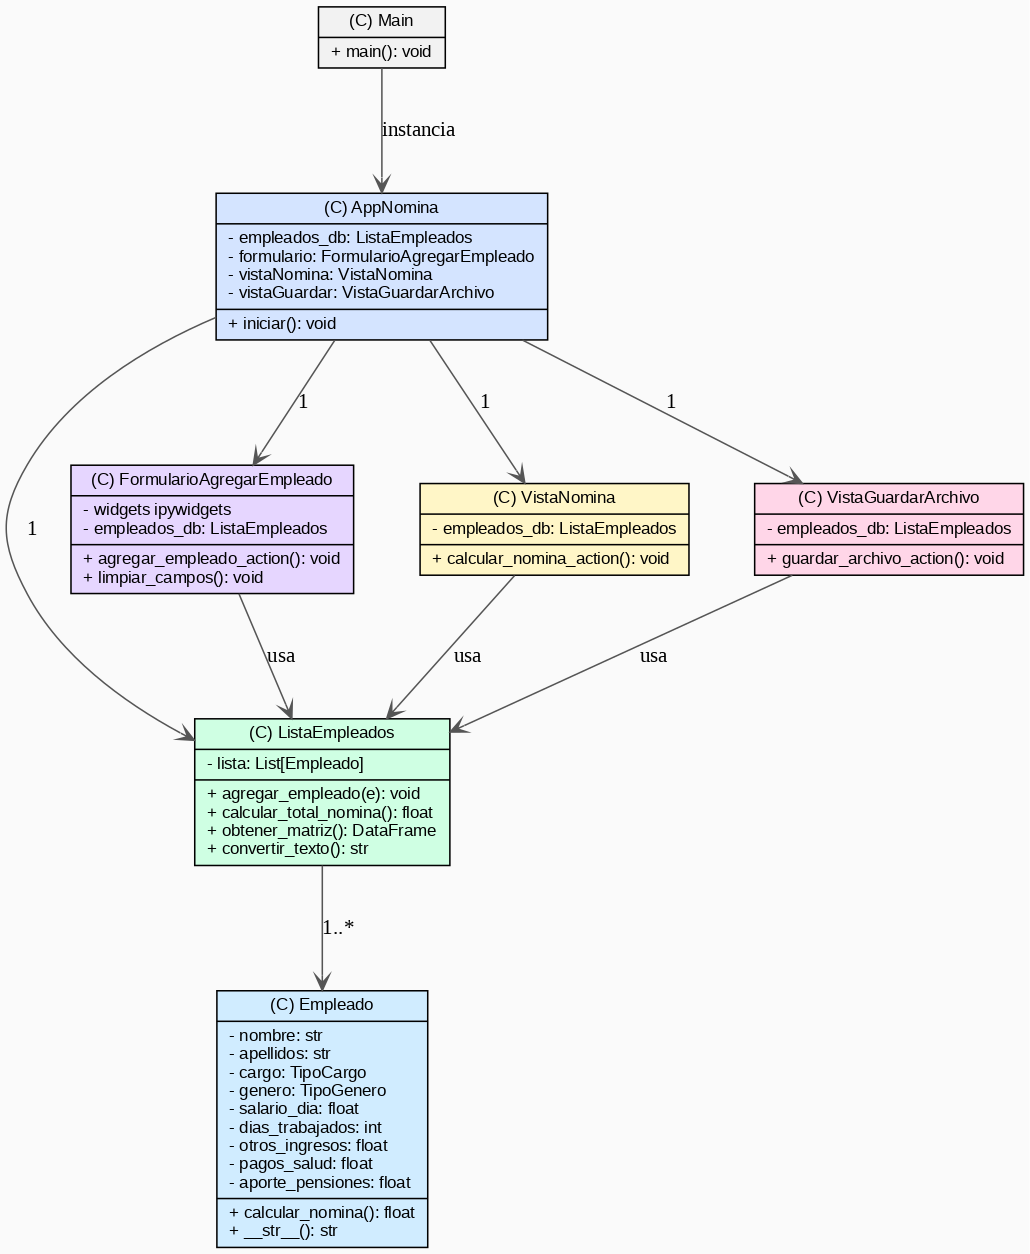

In [4]:
# @title
!apt-get install -y graphviz > /dev/null 2>&1
!pip install graphviz > /dev/null 2>&1

from graphviz import Digraph
from IPython.display import Image, display

uml = Digraph('UML_Nomina_Python', filename='uml_nomina_python_colores', format='png')

# Configuración
uml.attr(rankdir='TB', ranksep='0.9', nodesep='0.6', bgcolor='#fafafa')
uml.attr('graph', dpi='110')
uml.attr('node', shape='record', style='filled', fontname='Helvetica', fontsize='11')

# CLASE: Empleado
empleado = '''{
(C) Empleado
|
- nombre: str\\l
- apellidos: str\\l
- cargo: TipoCargo\\l
- genero: TipoGenero\\l
- salario_dia: float\\l
- dias_trabajados: int\\l
- otros_ingresos: float\\l
- pagos_salud: float\\l
- aporte_pensiones: float\\l
|
+ calcular_nomina(): float\\l
+ __str__(): str\\l
}'''

uml.node("Empleado", empleado, fillcolor="#D0ECFF")

# CLASE: ListaEmpleados
lista_empleados = '''{
(C) ListaEmpleados
|
- lista: List[Empleado]\\l
|
+ agregar_empleado(e): void\\l
+ calcular_total_nomina(): float\\l
+ obtener_matriz(): DataFrame\\l
+ convertir_texto(): str\\l
}'''

uml.node("ListaEmpleados", lista_empleados, fillcolor="#CFFFE3")

# COMPONENTE GUI: FormularioAgregarEmpleado
gui_agregar = '''{
(C) FormularioAgregarEmpleado
|
- widgets ipywidgets\\l
- empleados_db: ListaEmpleados\\l
|
+ agregar_empleado_action(): void\\l
+ limpiar_campos(): void\\l
}'''

uml.node("FormularioAgregar", gui_agregar, fillcolor="#E6D6FF")

# COMPONENTE GUI: VistaNomina
gui_nomina = '''{
(C) VistaNomina
|
- empleados_db: ListaEmpleados\\l
|
+ calcular_nomina_action(): void\\l
}'''

uml.node("VistaNomina", gui_nomina, fillcolor="#FFF6C7")

# COMPONENTE GUI: GuardarArchivo
gui_guardar = '''{
(C) VistaGuardarArchivo
|
- empleados_db: ListaEmpleados\\l
|
+ guardar_archivo_action(): void\\l
}'''

uml.node("VistaGuardar", gui_guardar, fillcolor="#FFD6E8")

# COMPONENTE GUI: AplicaciónPrincipal
gui_principal = '''{
(C) AppNomina
|
- empleados_db: ListaEmpleados\\l
- formulario: FormularioAgregarEmpleado\\l
- vistaNomina: VistaNomina\\l
- vistaGuardar: VistaGuardarArchivo\\l
|
+ iniciar(): void\\l
}'''

uml.node("AppNomina", gui_principal, fillcolor="#D4E4FF")

# CLASE MAIN
main_class = '''{
(C) Main
|
+ main(): void\\l
}'''

uml.node("Main", main_class, fillcolor="#F2F2F2")

# RELACIONES UML

uml.attr('edge', arrowhead='open', style='solid', color='#555555')

# Composición ListaEmpleados → Empleado
uml.edge("ListaEmpleados", "Empleado", label="1..*")

# GUI usa ListaEmpleados
uml.edge("FormularioAgregar", "ListaEmpleados", label="usa")
uml.edge("VistaNomina", "ListaEmpleados", label="usa")
uml.edge("VistaGuardar", "ListaEmpleados", label="usa")

# App principal contiene componentes
uml.edge("AppNomina", "FormularioAgregar", label="1")
uml.edge("AppNomina", "VistaNomina", label="1")
uml.edge("AppNomina", "VistaGuardar", label="1")
uml.edge("AppNomina", "ListaEmpleados", label="1")

# Main instancia AppNomina
uml.edge("Main", "AppNomina", label="instancia")

# GENERAR IMAGEN
output_path = uml.render(cleanup=True)
display(Image(filename=output_path))

In [5]:
# @title
import ipywidgets as widgets
from IPython.display import display, clear_output, HTML
import os
import pandas as pd
from enum import Enum

# Definición de Clases

class TipoCargo(Enum):
    DIRECTIVO = "Directivo"
    ESTRATEGICO = "Estratégico"
    OPERATIVO = "Operativo"

class TipoGenero(Enum):
    MASCULINO = "Masculino"
    FEMENINO = "Femenino"

class Empleado:
    """
    Clase que modela un empleado de una empresa.
    """
    def __init__(self, nombre, apellidos, cargo, genero, salario_dia,
                 dias_trabajados, otros_ingresos, pagos_salud, aporte_pensiones):

        self.nombre = nombre
        self.apellidos = apellidos
        self.cargo = cargo
        self.genero = genero
        self.salario_dia = salario_dia
        self.dias_trabajados = dias_trabajados
        self.otros_ingresos = otros_ingresos
        self.pagos_salud = pagos_salud
        self.aporte_pensiones = aporte_pensiones

    def calcular_nomina(self):
        """
        Calcula el salario mensual del empleado.
        Salario mensual = (días trabajados * sueldo por día) + otros ingresos -
                          pagos por salud - aporte pensiones
        """
        salario_base = self.salario_dia * self.dias_trabajados
        salario_mensual = salario_base + self.otros_ingresos - self.pagos_salud - self.aporte_pensiones
        return salario_mensual

    def __str__(self):
        """Método para obtener una representación en texto del empleado."""
        nomina = self.calcular_nomina()
        return (
            f"Nombre = {self.nombre}\n"
            f"Apellidos = {self.apellidos}\n"
            f"Cargo = {self.cargo.value}\n"
            f"Género = {self.genero.value}\n"
            f"Salario por día = ${self.salario_dia:.2f}\n"
            f"Días trabajados = {self.dias_trabajados}\n"
            f"Otros ingresos = ${self.otros_ingresos:.2f}\n"
            f"Pagos por salud = ${self.pagos_salud:.2f}\n"
            f"Aportes pensiones = ${self.aporte_pensiones:.2f}\n"
            f"Salario Mensual = ${nomina:.2f}\n"
            f"----------------------------------------"
        )

class ListaEmpleados:
    """
    Clase que maneja la lista de objetos Empleado y calcula la nómina total.
    """
    def __init__(self):
        self.lista = []

    def agregar_empleado(self, empleado):
        """Agrega un objeto Empleado a la lista."""
        self.lista.append(empleado)

    def calcular_total_nomina(self):
        """Calcula el total de la nómina mensual de la empresa."""
        total = sum(e.calcular_nomina() for e in self.lista)
        return total

    def obtener_matriz(self):
        """Convierte la lista de empleados a una estructura de datos para la tabla."""
        datos = []
        for e in self.lista:
            datos.append({
                'NOMBRE': e.nombre,
                'APELLIDOS': e.apellidos,
                'SUELDO ($)': f"{e.calcular_nomina():.2f}"
            })
        return pd.DataFrame(datos)

    def convertir_texto(self):
        """Convierte los datos de la lista de empleados a un string para guardar en archivo."""
        texto = ""
        for e in self.lista:
            texto += str(e) + "\n"

        total_nomina = self.calcular_total_nomina()
        texto += f"\nTotal nómina de la empresa = ${total_nomina:.2f}"
        return texto

# Interfaz Gráfica

# INSTANCIA PRINCIPAL DE LA CLASE DE NEGOCIO
empleados_db = ListaEmpleados()

output_log = widgets.Output() # Para mensajes de error o confirmación
output_nomina = widgets.Output() # Para mostrar la tabla de nómina

# Etiquetas y campos de entrada
campo_nombre = widgets.Text(description='Nombre:', placeholder='Nombre')
campo_apellidos = widgets.Text(description='Apellidos:', placeholder='Apellidos')

# Cargo
opciones_cargo = [c.value for c in TipoCargo]
campo_cargo = widgets.Dropdown(description='Cargo:', options=opciones_cargo, value=TipoCargo.OPERATIVO.value)

# Género
grupo_genero = widgets.RadioButtons(description='Género:', options=[g.value for g in TipoGenero], value=TipoGenero.MASCULINO.value)

# Salario y otros valores
campo_salario_dia = widgets.FloatText(description='Salario/Día ($):', value=0.0, step=0.01,layout=widgets.Layout(width='450px'),style={'description_width': '135px'})
campo_otros_ingresos = widgets.FloatText(description='Otros Ingresos ($):', value=0.0, step=0.01,layout=widgets.Layout(width='450px'),style={'description_width': '135px'})
campo_pagos_salud = widgets.FloatText(description='Pagos Salud ($):', value=0.0, step=0.01,layout=widgets.Layout(width='450px'),style={'description_width': '135px'})
campo_pensiones = widgets.FloatText(description='Aporte Pensiones ($):', value=0.0, step=0.01,layout=widgets.Layout(width='450px'),style={'description_width': '135px'})

# Días trabajados
campo_dias_trabajados = widgets.IntSlider(
    description='Días Trabajados:',
    min=1, max=31, value=30,layout=widgets.Layout(width='450px'),style={'description_width': '135px'},
    continuous_update=False
)

# Botones
btn_agregar = widgets.Button(description="Agregar Empleado", button_style='success')
btn_limpiar_form = widgets.Button(description="Limpiar Formulario", button_style='info')

# Diseño del Formulario de Agregar Empleado
form_agregar_empleado = widgets.VBox([
    widgets.Label("### 1. Agregar Empleado"),
    campo_nombre,
    campo_apellidos,
    campo_cargo,
    grupo_genero,
    campo_salario_dia,
    campo_dias_trabajados,
    campo_otros_ingresos,
    campo_pagos_salud,
    campo_pensiones,
    widgets.HBox([btn_agregar, btn_limpiar_form])
])

# Agregar Empleado

def limpiar_campos_formulario(b=None):
    """Limpia todos los campos del formulario."""
    campo_nombre.value = ''
    campo_apellidos.value = ''
    campo_cargo.value = TipoCargo.OPERATIVO.value
    grupo_genero.value = TipoGenero.MASCULINO.value
    campo_salario_dia.value = 0.0
    campo_dias_trabajados.value = 30
    campo_otros_ingresos.value = 0.0
    campo_pagos_salud.value = 0.0
    campo_pensiones.value = 0.0
    with output_log:
        clear_output(wait=True)
        print(">> Formulario limpiado.")

def agregar_empleado_action(b):
    """Valida los datos y añade un nuevo Empleado a la lista."""
    with output_log:
        clear_output(wait=True)

        # Validación de campos obligatorios
        if not campo_nombre.value or not campo_apellidos.value:
            print("ERROR: Nombre y Apellidos son obligatorios.")
            return

        try:
            # Recolección y conversión de datos
            nombre = campo_nombre.value.strip()
            apellidos = campo_apellidos.value.strip()

            # Mapeo de valores de Dropdown/RadioButtons a Enums
            tipo_c = TipoCargo(campo_cargo.value)
            tipo_g = TipoGenero(grupo_genero.value)

            salario_dia = campo_salario_dia.value
            dias_trabajados = campo_dias_trabajados.value
            otros_ingresos = campo_otros_ingresos.value
            pagos_salud = campo_pagos_salud.value
            aporte_pensiones = campo_pensiones.value

            # Crear y agregar el empleado
            empleado = Empleado(nombre, apellidos, tipo_c, tipo_g,
                                salario_dia, dias_trabajados,
                                otros_ingresos, pagos_salud, aporte_pensiones)

            empleados_db.agregar_empleado(empleado)

            print(f"ÉXITO: Empleado '{nombre} {apellidos}' agregado.")
            limpiar_campos_formulario()

        except Exception as e:
            print(f"ERROR en el formato de datos: {e}")
            print("Asegúrese de que todos los valores numéricos sean válidos.")

# Conexión de botones
btn_agregar.on_click(agregar_empleado_action)
btn_limpiar_form.on_click(limpiar_campos_formulario)


# Calcular Nómina

btn_calcular_nomina = widgets.Button(description="Calcular Nómina", button_style='primary')

def calcular_nomina_action(b):
    """Muestra la tabla de empleados y el total de la nómina."""
    with output_nomina:
        clear_output(wait=True)

        if not empleados_db.lista:
            display(HTML("<p style='color: orange;'>No hay empleados ingresados para calcular la nómina.</p>"))
            return

        # Obtener la tabla
        df = empleados_db.obtener_matriz()

        # Calcular el total
        total_nomina = empleados_db.calcular_total_nomina()

        # Mostrar la tabla
        display(HTML("### Nómina de Empleados"))
        display(df) # Muestra la tabla de DataFrame

        # Mostrar el total en la parte inferior
        total_html = f"<h4 style='text-align: right; color: #007bff;'>Total Nómina de la Empresa: ${total_nomina:,.2f}</h4>"
        display(HTML(total_html))

btn_calcular_nomina.on_click(calcular_nomina_action)

# Guardar Archivo

btn_guardar_archivo = widgets.Button(description="Guardar Archivo (Nómina.txt)", button_style='danger')

def guardar_archivo_action(b):
    """Guarda los datos de la nómina en un archivo Nómina.txt en el directorio de Colab."""
    file_path = "Nómina.txt"

    with output_log:
        clear_output(wait=True)

        if not empleados_db.lista:
            print("ADVERTENCIA: No hay datos para guardar.")
            return

        try:
            contenido = empleados_db.convertir_texto()

            # Guardar el archivo
            with open(file_path, "w", encoding="utf-8") as f:
                f.write(contenido)

            # Mensaje de confirmación
            print(f"ÉXITO: El archivo de la nómina '{file_path}' se ha creado en el directorio actual de Colab.")

        except Exception as e:
            print(f"ERROR: No se pudo escribir el archivo. {e}")

btn_guardar_archivo.on_click(guardar_archivo_action)

# Display de la Aplicación Principal

# Se crea un contenedor de pestañas para simular los menús/ventanas
tab_widget = widgets.Tab()
tab_widget.children = [
    form_agregar_empleado,
    widgets.VBox([btn_calcular_nomina, output_nomina]),
    widgets.VBox([btn_guardar_archivo, output_log])
]

# Títulos de las pestañas
tab_widget.set_title(0, 'Agregar Empleado')
tab_widget.set_title(1, 'Calcular Nómina')
tab_widget.set_title(2, 'Guardar Archivo')

# Título Principal
titulo = widgets.HTML("<h2>Sistema de Nómina (Ejercicio 8.4 Adaptado)</h2>")

# Diseño final de la aplicación
app_layout = widgets.VBox([
    titulo,
    tab_widget,
    widgets.HTML("<hr>"),
    widgets.Label("Log de Operaciones y Mensajes:"),
    output_log
])

# Mostrar la interfaz en Colab
display(app_layout)

# Diagrama de usos


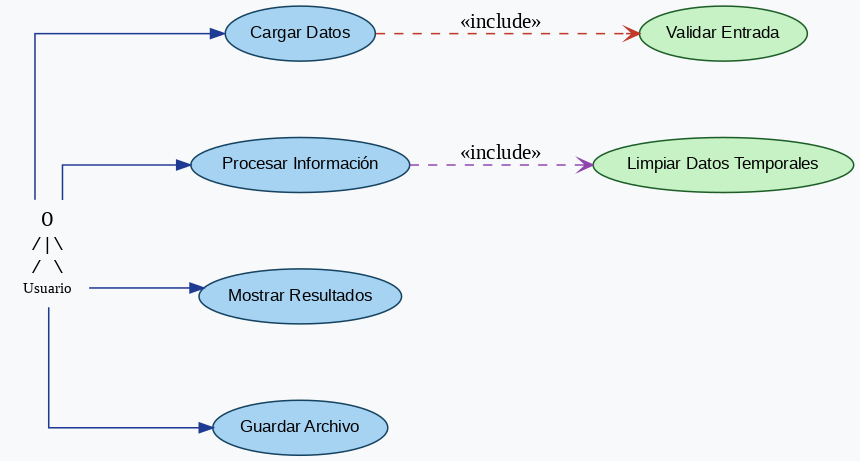

In [9]:
# @title
!apt-get install -y graphviz > /dev/null 2>&1
!pip install graphviz > /dev/null 2>&1

from graphviz import Digraph
from IPython.display import Image, display

# Crear diagrama
dot = Digraph('CasosDeUso_Procesamiento', filename='uml_casos_uso_procesamiento', format='png')

# Configuración general
dot.attr(
    rankdir='LR',
    bgcolor='#f8f9fa',
    splines='ortho',
    dpi='110',
    nodesep='0.7',
    ranksep='0.9'
)

# Stickman
stickman_html = '''<
<TABLE BORDER="0" CELLBORDER="0" CELLPADDING="0">
  <TR><TD ALIGN="CENTER"><FONT FACE="monospace" POINT-SIZE="14">O</FONT></TD></TR>
  <TR><TD ALIGN="CENTER"><FONT FACE="monospace" POINT-SIZE="12">/|\\</FONT></TD></TR>
  <TR><TD ALIGN="CENTER"><FONT FACE="monospace" POINT-SIZE="12">/ \\</FONT></TD></TR>
  <TR><TD ALIGN="CENTER"><FONT POINT-SIZE="10">Usuario</FONT></TD></TR>
</TABLE>>'''

dot.node('actor', stickman_html, shape='none')

# Casos de uso (óvalos)
dot.attr(
    'node',
    shape='ellipse',
    style='filled',
    fillcolor='#A7D3F3',
    color='#154360',
    fontname='Helvetica',
    fontsize='11'
)

dot.node('cu_cargar', 'Cargar Datos')
dot.node('cu_procesar', 'Procesar Información')
dot.node('cu_resultados', 'Mostrar Resultados')
dot.node('cu_guardar', 'Guardar Archivo')

# Casos auxiliares con color distinto
dot.node('cu_validar', 'Validar Entrada', fillcolor='#C7F2C6', color='#1D5E28')
dot.node('cu_limpiar', 'Limpiar Datos Temporales', fillcolor='#C7F2C6', color='#1D5E28')

# Flechas principales actor → casos de uso
dot.attr(
    'edge',
    arrowhead='normal',
    style='solid',
    color='#1F3A93',
    arrowsize='0.9'
)

dot.edge('actor', 'cu_cargar')
dot.edge('actor', 'cu_procesar')
dot.edge('actor', 'cu_resultados')
dot.edge('actor', 'cu_guardar')

# Relaciones «include»
dot.edge('cu_cargar', 'cu_validar',
         label='«include»',
         arrowhead='open',
         style='dashed',
         color='#C0392B')

dot.edge('cu_procesar', 'cu_limpiar',
         label='«include»',
         arrowhead='open',
         style='dashed',
         color='#8E44AD')

# Render y mostrar
output_path = dot.render(cleanup=True)
display(Image(filename=output_path))


# Enunciado: Hotel

## Ejercicio 8.5. Gestión de contenidos

Se requiere un programa que permita gestionar el ingreso y salida de los huéspedes de un hotel. El hotel contiene diez habitaciones simples. Las primeras cinco habitaciones tienen un precio de $120000 por día y las otras cinco habitaciones, $160000 por día.

El programa cuenta con dos opciones de menú:

- Consultar habitaciones: al seleccionar este ítem de menú se debe generar una ventana que presenta las diez habitaciones del hotel y su estado: disponible o no disponible. El usuario debe seleccionar el número de la habitación a ocupar. Si se ingresa una habitación ocupada se genera el mensaje de error correspondiente. Luego, el programa genera una ventana donde se ingresa la fecha de ingreso y los datos del huésped (nombre, apellidos y número de documento de identidad). Los campos de entrada son obligatorios y se deben validar previamente. Si el registro es correcto se genera el mensaje correspondiente. Si después se consulta el listado de habitaciones, la habitación debe aparecer como “No disponible”.

- Salida de huéspedes: al seleccionar este ítem de menú se debe generar una ventana donde se solicita el número de habitación a entregar. Si la habitación no está ocupada o se ingresa un número o dato incorrecto se genera el mensaje de error correspondiente. Si el número es correcto, se genera una nueva ventana donde se identifica la habitación a entregar y se ingresa la fecha de salida del huésped. Esta fecha debe ser mayor a la fecha de ingreso al hotel. Si la fecha es correcta se habilita un botón que permite calcular el total de días de alojamiento del huésped y el total a pagar por el mismo. Si el usuario oprime el botón “Registrar salida”, la habitación queda disponible.

Se deben utilizar los layouts que se consideren convenientes para organizar las diferentes configuraciones de los componentes visuales de las ventanas del programa.





# Diagrama de clases

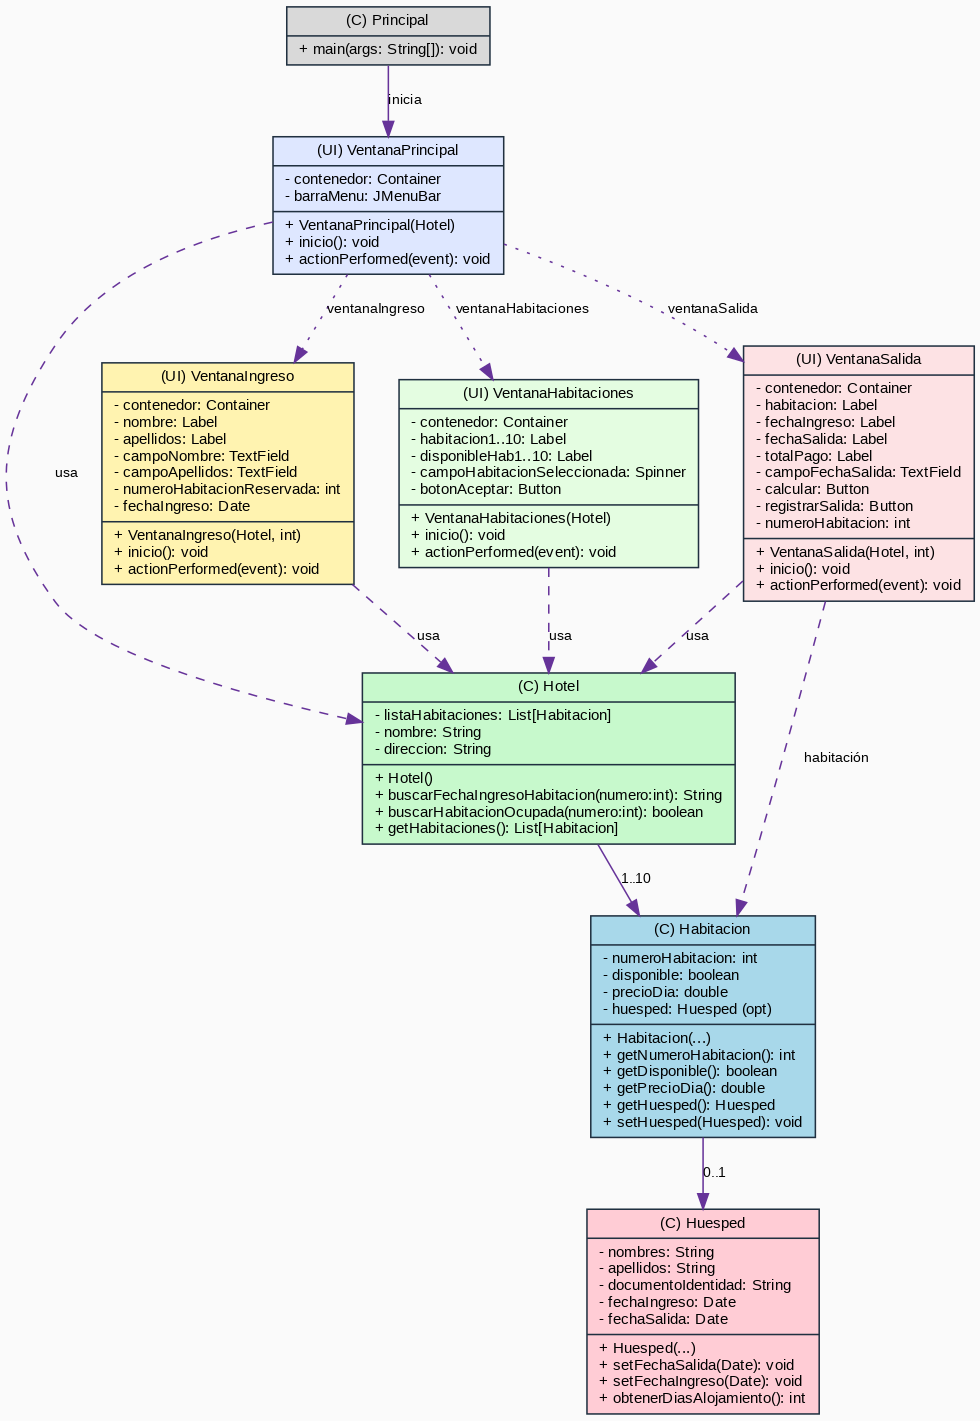

In [12]:
# @title
!apt-get install -y graphviz > /dev/null 2>&1
!pip install graphviz > /dev/null 2>&1

from graphviz import Digraph
from IPython.display import Image, display, HTML

# Construcción del diagrama UML
dot = Digraph('DiagramaClasesHotel', filename='uml_hotel_ultra_colores', format='png')
dot.attr(
    rankdir='TB',
    ranksep='0.5',
    nodesep='0.4',
    bgcolor='#FAFAFA'
)

dot.attr('graph', dpi='110')

dot.attr(
    'node',
    shape='record',
    style='filled',
    color='#203040',
    fontname='Helvetica',
    fontsize='10'
)

# Estilo de aristas
dot.attr(
    'edge',
    fontname='Helvetica',
    fontsize='9',
    color='#663399'
)

# CLASE: Hotel
dot.node(
    'Hotel',
    r'''{
(C) Hotel
|
- listaHabitaciones: List[Habitacion]\l
- nombre: String\l
- direccion: String\l
|
+ Hotel()\l
+ buscarFechaIngresoHabitacion(numero:int): String\l
+ buscarHabitacionOcupada(numero:int): boolean\l
+ getHabitaciones(): List[Habitacion]\l
}''',
    fillcolor='#C7F9CC'
)

# CLASE: Habitacion
dot.node(
    'Habitacion',
    r'''{
(C) Habitacion
|
- numeroHabitacion: int\l
- disponible: boolean\l
- precioDia: double\l
- huesped: Huesped (opt)\l
|
+ Habitacion(...)\l
+ getNumeroHabitacion(): int\l
+ getDisponible(): boolean\l
+ getPrecioDia(): double\l
+ getHuesped(): Huesped\l
+ setHuesped(Huesped): void\l
}''',
    fillcolor='#A8D8EA'
)

# CLASE: Huesped
dot.node(
    'Huesped',
    r'''{
(C) Huesped
|
- nombres: String\l
- apellidos: String\l
- documentoIdentidad: String\l
- fechaIngreso: Date\l
- fechaSalida: Date\l
|
+ Huesped(...)\l
+ setFechaSalida(Date): void\l
+ setFechaIngreso(Date): void\l
+ obtenerDiasAlojamiento(): int\l
}''',
    fillcolor='#FFCCD5'
)

# CLASES UI (colores nuevos)

dot.node(
    'VentanaIngreso',
    r'''{
(UI) VentanaIngreso
|
- contenedor: Container\l
- nombre: Label\l
- apellidos: Label\l
- campoNombre: TextField\l
- campoApellidos: TextField\l
- numeroHabitacionReservada: int\l
- fechaIngreso: Date\l
|
+ VentanaIngreso(Hotel, int)\l
+ inicio(): void\l
+ actionPerformed(event): void\l
}''',
    fillcolor='#FFF3B0'
)

dot.node(
    'VentanaHabitaciones',
    r'''{
(UI) VentanaHabitaciones
|
- contenedor: Container\l
- habitacion1..10: Label\l
- disponibleHab1..10: Label\l
- campoHabitacionSeleccionada: Spinner\l
- botonAceptar: Button\l
|
+ VentanaHabitaciones(Hotel)\l
+ inicio(): void\l
+ actionPerformed(event): void\l
}''',
    fillcolor='#E4FDE1'
)

dot.node(
    'VentanaSalida',
    r'''{
(UI) VentanaSalida
|
- contenedor: Container\l
- habitacion: Label\l
- fechaIngreso: Label\l
- fechaSalida: Label\l
- totalPago: Label\l
- campoFechaSalida: TextField\l
- calcular: Button\l
- registrarSalida: Button\l
- numeroHabitacion: int\l
|
+ VentanaSalida(Hotel, int)\l
+ inicio(): void\l
+ actionPerformed(event): void\l
}''',
    fillcolor='#FDE2E4'
)

dot.node(
    'VentanaPrincipal',
    r'''{
(UI) VentanaPrincipal
|
- contenedor: Container\l
- barraMenu: JMenuBar\l
|
+ VentanaPrincipal(Hotel)\l
+ inicio(): void\l
+ actionPerformed(event): void\l
}''',
    fillcolor='#DEE7FF'
)

dot.node(
    'Principal',
    r'''{
(C) Principal
|
+ main(args: String[]): void\l
}''',
    fillcolor='#D9D9D9'
)

# RELACIONES

dot.edge('Hotel', 'Habitacion', label='1..10')
dot.edge('Habitacion', 'Huesped', label='0..1')

dot.edge('VentanaIngreso', 'Hotel', label='usa', style='dashed')
dot.edge('VentanaHabitaciones', 'Hotel', label='usa', style='dashed')
dot.edge('VentanaSalida', 'Hotel', label='usa', style='dashed')
dot.edge('VentanaSalida', 'Habitacion', label='habitación', style='dashed')

dot.edge('VentanaPrincipal', 'Hotel', label='usa', style='dashed')
dot.edge('Principal', 'VentanaPrincipal', label='inicia')

dot.edge('VentanaPrincipal', 'VentanaIngreso', label='ventanaIngreso', style='dotted')
dot.edge('VentanaPrincipal', 'VentanaHabitaciones', label='ventanaHabitaciones', style='dotted')
dot.edge('VentanaPrincipal', 'VentanaSalida', label='ventanaSalida', style='dotted')

# GENERAR IMAGEN
output_path = dot.render(cleanup=True)

display(HTML("<h3>Diagrama UML generado con NUEVOS COLORES</h3>"))
display(Image(filename=output_path, width=1200))


In [16]:
# @title
import ipywidgets as widgets
from IPython.display import display, clear_output, HTML
from datetime import datetime
import pandas as pd
from IPython.display import HTML
display(HTML("""
<style>
.widget-label {
    min-width: 200px !important;
    width: auto !important;
    white-space: normal !important;
}

/* Permite botones más anchos automáticamente */
button.jupyter-widgets.jupyter-button {
    width: auto !important;
    max-width: 20% !important;
}
</style>
"""))

# Constantes de Precios
PRECIO_SIMPLE = 120000
PRECIO_PREMIUM = 160000
NUM_HABITACIONES = 10

# Configuración de Layout para etiquetas
WIDGET_LAYOUT = widgets.Layout(width='600px', description_width='350px')
TINY_LAYOUT = widgets.Layout(width='300px', description_width='150px')

# 1. Clases del Enunciado

class Huesped:
    """Clase que representa a la persona que ocupa la habitación."""
    def __init__(self, nombre, apellidos, documento):
        self.nombre = nombre
        self.apellidos = apellidos
        self.documento = documento

    def __str__(self):
        return f"{self.nombre} {self.apellidos} (ID: {self.documento})"

class Habitacion:
    """Clase que modela una habitación de hotel."""
    def __init__(self, numero):
        self.numero = numero
        self.precio_dia = PRECIO_SIMPLE if numero <= 5 else PRECIO_PREMIUM
        self.disponible = True
        self.huesped = None
        self.fecha_ingreso = None

    def ocupar(self, huesped, fecha_ingreso):
        """Marca la habitación como ocupada y asigna huésped y fecha de ingreso."""
        self.disponible = False
        self.huesped = huesped
        self.fecha_ingreso = fecha_ingreso

    def liberar(self):
        """Libera la habitación y limpia los datos del huésped."""
        self.disponible = True
        self.huesped = None
        self.fecha_ingreso = None

    def get_estado(self):
        """Retorna el estado de la habitación en texto."""
        return "Disponible" if self.disponible else f"No disponible (Huésped: {self.huesped.nombre} - Ingreso: {self.fecha_ingreso.strftime('%d/%m/%Y')})"

class Hotel:
    """Clase principal que contiene y gestiona todas las habitaciones."""
    def __init__(self):
        self.habitaciones = [Habitacion(i) for i in range(1, NUM_HABITACIONES + 1)]

    def get_habitacion(self, numero):
        """Retorna el objeto Habitacion por su número (1 a 10)."""
        if 1 <= numero <= NUM_HABITACIONES:
            return self.habitaciones[numero - 1]
        return None

    def get_listado_df(self):
        """Retorna un DataFrame con el estado de todas las habitaciones."""
        data = []
        for hab in self.habitaciones:
            data.append({
                'Habitación': hab.numero,
                'Precio/Día ($)': f"{hab.precio_dia:,.0f}",
                'Estado': 'Disponible' if hab.disponible else 'OCUPADA',
                'Huésped': hab.huesped.nombre if hab.huesped else '-',
                'Fecha Ingreso': hab.fecha_ingreso.strftime('%d/%m/%Y') if hab.fecha_ingreso else '-'
            })
        return pd.DataFrame(data)

mi_hotel = Hotel()

# Interfaz

output_log = widgets.Output()
output_consulta = widgets.Output()
output_salida = widgets.Output()

# Selección de Habitación
hab_disponibles_options = [str(i) for i in range(1, NUM_HABITACIONES + 1)]
campo_num_hab_ingreso = widgets.Dropdown(
    description='Seleccionar Habitación:',
    options=hab_disponibles_options,
    value='1',
    layout=TINY_LAYOUT
)
btn_ver_habitaciones = widgets.Button(description="Consultar Estado de Habitaciones", button_style='primary')
btn_ocupar_hab = widgets.Button(description="Continuar para Ocupar", button_style='warning')
tabla_habitaciones_view = widgets.Output()

# Datos del Huésped
campo_fecha_ingreso = widgets.DatePicker(
    description='Fecha de Ingreso:',
    disabled=False,
    layout=WIDGET_LAYOUT
)
campo_huesped_nombre = widgets.Text(description='Nombre del Huésped:', placeholder='Nombre', layout=WIDGET_LAYOUT)
campo_huesped_apellidos = widgets.Text(description='Apellidos del Huésped:', placeholder='Apellidos', layout=WIDGET_LAYOUT)
campo_huesped_doc = widgets.Text(description='Documento de Identidad:', placeholder='Documento', layout=WIDGET_LAYOUT)

btn_registrar_ingreso = widgets.Button(description="Registrar Ingreso", button_style='success')

# Contenedor para los datos del huésped
form_ingreso_huesped = widgets.VBox([
    widgets.Label("### 2. Datos del Huésped y Registro de Ingreso"),
    campo_fecha_ingreso,
    campo_huesped_nombre,
    campo_huesped_apellidos,
    campo_huesped_doc,
    btn_registrar_ingreso
])

# Inicialmente ocultamos el formulario de ingreso
form_ingreso_huesped.layout.visibility = 'hidden'

def actualizar_listado_habitaciones(b=None):
    """Genera y muestra la tabla de estado de habitaciones."""
    with tabla_habitaciones_view:
        clear_output(wait=True)
        df = mi_hotel.get_listado_df()
        display(HTML("<h4>Listado de Habitaciones</h4>"))
        display(df.style.set_properties(**{'font-size': '10pt'}))

def iniciar_ocupacion(b):
    """Valida la habitación seleccionada y muestra el formulario de huésped."""
    with output_log:
        clear_output(wait=True)

        try:
            num_hab = int(campo_num_hab_ingreso.value)
            habitacion = mi_hotel.get_habitacion(num_hab)

            if not habitacion:
                print("ERROR: Número de habitación inválido.")
                form_ingreso_huesped.layout.visibility = 'hidden'
                return

            if not habitacion.disponible:
                print(f"ERROR: La habitación {num_hab} ya está ocupada por: {habitacion.huesped}.")
                form_ingreso_huesped.layout.visibility = 'hidden'
                return

            print(f"CONFIRMADO: Habitación {num_hab} disponible. Proceda a ingresar los datos del huésped.")
            form_ingreso_huesped.layout.visibility = 'visible'
            campo_huesped_nombre.value = ''
            campo_huesped_apellidos.value = ''
            campo_huesped_doc.value = ''
            campo_fecha_ingreso.value = datetime.now().date()

        except ValueError:
            print("ERROR: Ingrese un número de habitación válido.")
            form_ingreso_huesped.layout.visibility = 'hidden'


def registrar_ingreso(b):
    """Registra el huésped en la habitación seleccionada y actualiza el estado."""
    with output_log:
        clear_output(wait=True)
        nombre = campo_huesped_nombre.value.strip()
        apellidos = campo_huesped_apellidos.value.strip()
        documento = campo_huesped_doc.value.strip()
        fecha_ingreso = campo_fecha_ingreso.value

        if not nombre or not apellidos or not documento or not fecha_ingreso:
            print("ERROR: Todos los campos del huésped son obligatorios.")
            return

        try:
            num_hab = int(campo_num_hab_ingreso.value)
            habitacion = mi_hotel.get_habitacion(num_hab)

            if not habitacion or not habitacion.disponible:
                print("ERROR: La habitación ya no está disponible o es inválida.")
                return

            huesped = Huesped(nombre, apellidos, documento)
            habitacion.ocupar(huesped, fecha_ingreso)

            print(f"ÉXITO: Ingreso registrado. Habitación {num_hab} ocupada por {huesped.nombre} {huesped.apellidos}.")

            form_ingreso_huesped.layout.visibility = 'hidden'
            actualizar_listado_habitaciones()

        except Exception as e:
            print(f"ERROR al registrar el ingreso: {e}")


btn_ver_habitaciones.on_click(actualizar_listado_habitaciones)
btn_ocupar_hab.on_click(iniciar_ocupacion)
btn_registrar_ingreso.on_click(registrar_ingreso)

tab_ingreso_layout = widgets.VBox([
    widgets.Label("### 1. Consulta de Habitaciones"),
    btn_ver_habitaciones,
    tabla_habitaciones_view,
    widgets.HBox([campo_num_hab_ingreso, btn_ocupar_hab]),
    form_ingreso_huesped
])


# Salida de Huéspedes

# Solicitud de Habitación
campo_num_hab_salida = widgets.Text(description='Número de Habitación a Entregar:', placeholder='1-10', layout=TINY_LAYOUT)
btn_buscar_hab_salida = widgets.Button(description="Buscar Habitación", button_style='primary')
info_salida_display = widgets.Output()

# Registro de Salida
campo_fecha_salida = widgets.DatePicker(
    description='Fecha de Salida:',
    disabled=False,
    layout=WIDGET_LAYOUT
)

btn_calcular_total = widgets.Button(description="Calcular Total a Pagar", button_style='info', disabled=True)
btn_registrar_salida = widgets.Button(description="Registrar Salida y Liberar Habitación", button_style='success', disabled=True)

# Variables de estado para la salida
habitacion_actual = None
total_a_pagar_label = widgets.HTML(value="")

form_salida_registro = widgets.VBox([
    widgets.Label("### 2. Registro de Salida"),
    info_salida_display,
    campo_fecha_salida,
    widgets.HBox([btn_calcular_total, btn_registrar_salida]),
    total_a_pagar_label
])

form_salida_registro.layout.visibility = 'hidden'

def buscar_habitacion_salida(b):
    """Busca la habitación y valida si está ocupada para la salida."""
    global habitacion_actual

    with output_log:
        clear_output(wait=True)
        info_salida_display.clear_output()
        form_salida_registro.layout.visibility = 'hidden'
        btn_calcular_total.disabled = True
        btn_registrar_salida.disabled = True
        total_a_pagar_label.value = ""

        try:
            num_hab = int(campo_num_hab_salida.value.strip())
            habitacion = mi_hotel.get_habitacion(num_hab)

            if not habitacion:
                print("ERROR: Número de habitación inválido (debe ser 1 a 10).")
                return

            if habitacion.disponible:
                print(f"ERROR: La habitación {num_hab} no está ocupada.")
                return

            habitacion_actual = habitacion

            with info_salida_display:
                clear_output(wait=True)
                display(HTML(f"<b>Habitación:</b> {habitacion_actual.numero} (Precio/Día: ${habitacion_actual.precio_dia:,.0f})"))
                display(HTML(f"<b>Huésped:</b> {habitacion_actual.huesped.nombre} {habitacion_actual.huesped.apellidos}"))
                display(HTML(f"<b>Fecha Ingreso:</b> {habitacion_actual.fecha_ingreso.strftime('%d/%m/%Y')}"))

            form_salida_registro.layout.visibility = 'visible'
            campo_fecha_salida.value = datetime.now().date()

            btn_calcular_total.disabled = False

            print(f"CONFIRMADO: Habitación {num_hab} lista para el registro de salida. Ingrese la fecha de salida y calcule el total.")

        except ValueError:
            print("ERROR: Ingrese un número válido para la habitación.")
        except Exception as e:
            print(f"ERROR inesperado: {e}")

def calcular_total_pagar(b):
    """Calcula los días de alojamiento y el costo total."""
    if not habitacion_actual:
        total_a_pagar_label.value = "<b style='color: red;'>ERROR: Seleccione una habitación primero.</b>"
        return

    fecha_ingreso = habitacion_actual.fecha_ingreso
    fecha_salida = campo_fecha_salida.value

    with output_log:
        clear_output(wait=True)
        total_a_pagar_label.value = ""
        btn_registrar_salida.disabled = True

        if not fecha_salida:
            print("ERROR: Debe seleccionar una fecha de salida.")
            return

        if fecha_salida <= fecha_ingreso:
            print("ERROR: La fecha de salida debe ser posterior a la fecha de ingreso.")
            return

        dias_alojamiento = (fecha_salida - fecha_ingreso).days
        total_pagar = dias_alojamiento * habitacion_actual.precio_dia

        total_a_pagar_label.value = f"""
            <div style='border: 1px solid #007bff; padding: 10px; border-radius: 5px; background-color: #f0f8ff;'>
                <p><b>Días de Alojamiento:</b> {dias_alojamiento} días</p>
                <h4 style='color: #28a745;'>TOTAL A PAGAR: ${total_pagar:,.2f}</h4>
            </div>
        """
        btn_registrar_salida.disabled = False
        print("Cálculo realizado. Puede proceder a registrar la salida.")


def registrar_salida_action(b):
    """Libera la habitación y resetea el estado."""
    global habitacion_actual

    with output_log:
        clear_output(wait=True)

        if not habitacion_actual:
            print("ERROR: No hay habitación seleccionada para la salida.")
            return

        num = habitacion_actual.numero
        habitacion_actual.liberar()

        print(f"ÉXITO: Se ha registrado la salida del huésped. La Habitación {num} ahora está DISPONIBLE.")

        campo_num_hab_salida.value = ''
        form_salida_registro.layout.visibility = 'hidden'
        habitacion_actual = None
        total_a_pagar_label.value = ""
        btn_calcular_total.disabled = True
        btn_registrar_salida.disabled = True
        actualizar_listado_habitaciones()

btn_buscar_hab_salida.on_click(buscar_habitacion_salida)
btn_calcular_total.on_click(calcular_total_pagar)
btn_registrar_salida.on_click(registrar_salida_action)

tab_salida_layout = widgets.VBox([
    widgets.Label("### 1. Búsqueda de Habitación"),
    widgets.HBox([campo_num_hab_salida, btn_buscar_hab_salida]),
    form_salida_registro
])

# Estructura de la Aplicación Principal

tab_widget = widgets.Tab()
tab_widget.children = [
    tab_ingreso_layout,
    tab_salida_layout
]

# Títulos de las pestañas
tab_widget.set_title(0, 'Consultar/Ocupar Habitación')
tab_widget.set_title(1, 'Salida de Huéspedes')

# Título Principal
titulo = widgets.HTML("<h2>Gestión de Hotel (10 Habitaciones)</h2>")

# Diseño final de la aplicación
app_layout = widgets.VBox([
    titulo,
    tab_widget,
    widgets.HTML("<hr>"),
    widgets.Label("Log de Operaciones y Mensajes:"),
    output_log
])

# Mostrar la interfaz en Colab
display(app_layout)

# Diagrama de usos

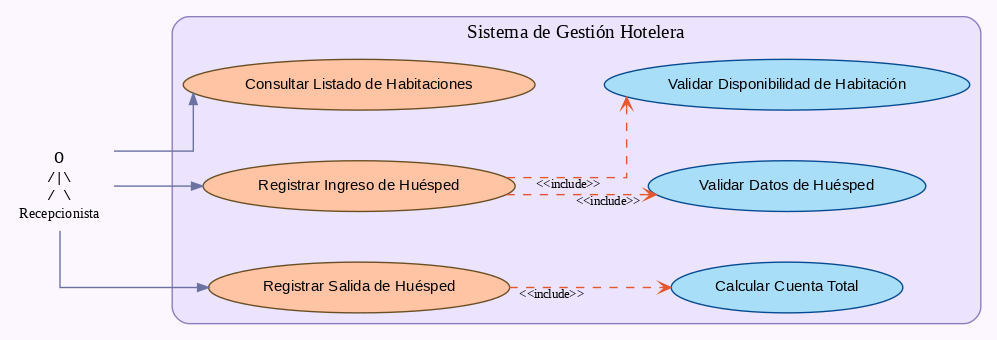

In [14]:
# @title
!apt-get install -y graphviz > /dev/null 2>&1
!pip install graphviz > /dev/null 2>&1

from graphviz import Digraph
from IPython.display import Image, display

# Crear el diagrama
dot = Digraph('CasosDeUsoHotelFijo', filename='uml_casos_uso_hotel_fijo_colores_nuevos', format='png')

dot.attr(
    rankdir='LR',
    bgcolor='#FCF7FF',
    splines='ortho',
    dpi='100',
    nodesep='0.5',
    ranksep='0.7'
)

# Actor Stickman
stickman_html = '''<
<TABLE BORDER="0" CELLBORDER="0" CELLPADDING="0">
  <TR><TD ALIGN="CENTER"><FONT FACE="monospace" POINT-SIZE="12">O</FONT></TD></TR>
  <TR><TD ALIGN="CENTER"><FONT FACE="monospace" POINT-SIZE="10">/|\\</FONT></TD></TR>
  <TR><TD ALIGN="CENTER"><FONT FACE="monospace" POINT-SIZE="10">/ \\</FONT></TD></TR>
  <TR><TD ALIGN="CENTER"><FONT POINT-SIZE="10">Recepcionista</FONT></TD></TR>
</TABLE>>'''

dot.node('actor', stickman_html, shape='none')

# Casos de Uso Principales
dot.attr(
    'node',
    shape='ellipse',
    style='filled',
    fillcolor='#FFDAC1',
    color='#6A4E23',
    fontname='Helvetica',
    fontsize='11',
    margin='0.1'
)

dot.node('uc_consultar_listado', 'Consultar Listado de Habitaciones', fillcolor='#FFC4A3')
dot.node('uc_registrar_ingreso', 'Registrar Ingreso de Huésped', fillcolor='#FFC4A3')
dot.node('uc_registrar_salida', 'Registrar Salida de Huésped', fillcolor='#FFC4A3')

# Casos de Uso Incluidos
dot.attr('node', fillcolor='#A9DEF9', color='#054A91')

dot.node('inc_validar_datos', 'Validar Datos de Huésped')
dot.node('inc_validar_disponibilidad', 'Validar Disponibilidad de Habitación')
dot.node('inc_calcular_cuenta', 'Calcular Cuenta Total')

# Relaciones
# Asociación (Actor → Casos principales)
dot.attr(
    'edge',
    arrowhead='normal',
    style='solid',
    color='#6B72A1',
    arrowsize='0.8'
)

dot.edge('actor', 'uc_consultar_listado')
dot.edge('actor', 'uc_registrar_ingreso')
dot.edge('actor', 'uc_registrar_salida')

# Inclusiones (Casos principales → Casos incluidos)
dot.attr(
    'edge',
    style='dashed',
    arrowhead='open',
    color='#E4572E',
    fontsize='9'
)

include_label = '&lt;&lt;include&gt;&gt;'

dot.edge('uc_registrar_ingreso', 'inc_validar_datos', xlabel=include_label)
dot.edge('uc_registrar_ingreso', 'inc_validar_disponibilidad', xlabel=include_label)

dot.edge('uc_registrar_salida', 'inc_calcular_cuenta', xlabel=include_label)

# Sistema
with dot.subgraph(name='cluster_0') as c:
    c.attr(
        label='Sistema de Gestión Hotelera',
        color='#8E7DBE',
        style='rounded, filled',
        fillcolor='#ECE4FF'
    )
    c.node('uc_consultar_listado')
    c.node('uc_registrar_ingreso')
    c.node('uc_registrar_salida')
    c.node('inc_validar_datos')
    c.node('inc_validar_disponibilidad')
    c.node('inc_calcular_cuenta')

# Mostrar diagrama
output_path = dot.render(cleanup=True)
display(Image(filename=output_path))

# Enunciado: Contactos

## Escenarios. Ejercicio 9.1 página 589


Se requiere desarrollar un programa que permita (en una ventana) ingresar los datos de un contacto en una agenda personal. Los datos de un contacto son:

- Nombres y apellidos: se ingresan en objetos TextField independientes.

- Fecha de nacimiento: se debe desplegar un calendario utilizando la clase DatePicker.

- Dirección, teléfono, correo electrónico: se ingresa en un TextField.

Una vez se ingresan los datos, se debe oprimir un botón denominado
“Agregar” que permite que el contacto se añada a una lista (clase ListView)
ubicada en la parte inferior de la ventana.

# Diagrama de clases

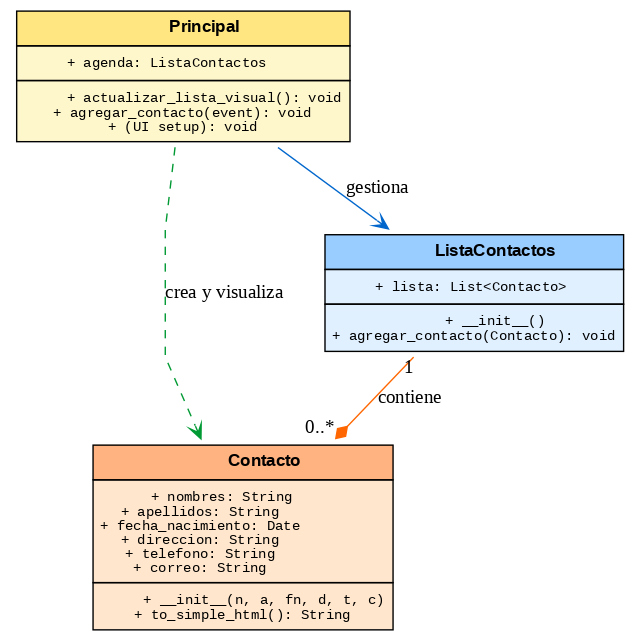

In [21]:
# @title
!apt-get install -y graphviz > /dev/null 2>&1
!pip install graphviz > /dev/null 2>&1

from graphviz import Digraph
from IPython.display import Image, display

# Configuración general
dot = Digraph('G', comment='Diagrama de Clases Agenda Personal', filename='uml_agenda_revisada', format='png')
dot.attr(
    rankdir='TB',
    bgcolor='white',
    splines='polyline',
    dpi='100',
    nodesep='0.6',
    ranksep='0.6'
)

# Función para crear nodos UML con colores nuevos
def create_uml_class(name, attributes, methods, color="#ffe6cc", header_color="#ffb380"):
    attr_text = '<BR/>'.join(attributes) if attributes else ' '
    method_text = '<BR/>'.join(methods) if methods else ' '

    html_label = f'''<
    <TABLE BORDER="0" CELLBORDER="1" CELLSPACING="0" CELLPADDING="4" BGCOLOR="{color}">
      <TR><TD COLSPAN="2" ALIGN="CENTER" BGCOLOR="{header_color}">
        <FONT FACE="Arial" POINT-SIZE="12"><b>{name}</b></FONT></TD></TR>

      <TR><TD ALIGN="LEFT" COLSPAN="2">
        <FONT FACE="Courier" POINT-SIZE="10">{attr_text}</FONT></TD></TR>

      <TR><TD ALIGN="LEFT" COLSPAN="2">
        <FONT FACE="Courier" POINT-SIZE="10">{method_text}</FONT></TD></TR>
    </TABLE>>'''
    return html_label

# Contacto

dot.node(
    'Contacto',
    create_uml_class(
        'Contacto',
        [
            '+ nombres: String',
            '+ apellidos: String',
            '+ fecha_nacimiento: Date',
            '+ direccion: String',
            '+ telefono: String',
            '+ correo: String',
        ],
        [
            '+ __init__(n, a, fn, d, t, c)',
            '+ to_simple_html(): String',
        ],
        color="#ffe6cc",
        header_color="#ffb380"
    ),
    shape='none'
)

# Clase ListaContactos

dot.node(
    'ListaContactos',
    create_uml_class(
        'ListaContactos',
        [
            '+ lista: List&lt;Contacto&gt;',
        ],
        [
            '+ __init__()',
            '+ agregar_contacto(Contacto): void',
        ],
        color="#e0f0ff",
        header_color="#99ccff"
    ),
    shape='none'
)

# Clase Principal

dot.node(
    'Principal',
    create_uml_class(
        'Principal',
        [
            '+ agenda: ListaContactos',
        ],
        [
            '+ actualizar_lista_visual(): void',
            '+ agregar_contacto(event): void',
            '+ (UI setup): void',
        ],
        color="#fff7cc",
        header_color="#ffe680"
    ),
    shape='none'
)

# Relaciones

# Composición
dot.attr('edge', arrowhead='diamond', style='solid', color='#ff6600')
dot.edge('ListaContactos', 'Contacto', label='contiene', headlabel='0..*', taillabel='1')

# Asociación
dot.attr('edge', arrowhead='open', style='solid', color='#0066cc')
dot.edge('Principal', 'ListaContactos', label='gestiona')

# Dependencia
dot.attr('edge', arrowhead='open', style='dashed', color='#009933')
dot.edge('Principal', 'Contacto', label='crea y visualiza')

# Gráfico en JPG
output_path = dot.render(cleanup=True)
display(Image(filename=output_path))


In [18]:
# @title
import ipywidgets as widgets
from IPython.display import display, clear_output, HTML
from datetime import date

# Clases

class Contacto:
    """Clase que define un contacto para una agenda personal."""
    def __init__(self, nombres, apellidos, fecha_nacimiento, direccion, telefono, correo):
        self.nombres = nombres
        self.apellidos = apellidos
        self.fecha_nacimiento = fecha_nacimiento
        self.direccion = direccion
        self.telefono = telefono
        self.correo = correo

    def to_simple_html(self):
        """Retorna una representación formateada y condensada del contacto para la lista."""
        fecha_str = self.fecha_nacimiento.strftime("%d/%m/%Y") if self.fecha_nacimiento else "N/A"

        return f"""
        <div style="margin-bottom: 10px; padding: 10px; border: 1px solid #ddd; border-radius: 5px; background-color: white;">
            <p style="margin: 0; font-weight: bold;"><i class="fas fa-user"></i> {self.nombres} {self.apellidos}</p>
            <p style="margin: 5px 0 0 0; font-size: small;">
                <i class="fas fa-calendar-alt"></i> {fecha_str} |
                <i class="fas fa-map-marker-alt"></i> {self.direccion} |
                <i class="fas fa-phone"></i> {self.telefono} |
                <i class="fas fa-envelope"></i> {self.correo}
            </p>
        </div>
        """

class ListaContactos:
    """Clase que define una lista de objetos de tipo Contacto."""
    def __init__(self):
        self.lista = []

    def agregar_contacto(self, contacto):
        """Método que agrega un contacto a la lista."""
        self.lista.append(contacto)

agenda = ListaContactos()

# Interfaz Gráfica

# Layout y Estilos
GRID_ITEM_LAYOUT = widgets.Layout(width='auto', padding='5px') # Para GridBox
FIELD_LAYOUT = widgets.Layout(width='280px')
LIST_LAYOUT = widgets.Layout(width='550px', height='300px', overflow='auto', background_color='white')
OUTPUT_LAYOUT = widgets.Layout(height='40px')

# Etiquetas
label_nombres = widgets.Label('Nombres:', layout=GRID_ITEM_LAYOUT)
label_apellidos = widgets.Label('Apellidos:', layout=GRID_ITEM_LAYOUT)
label_fecha_nacimiento = widgets.Label('Fecha Nacimiento:', layout=GRID_ITEM_LAYOUT)
label_direccion = widgets.Label('Dirección:', layout=GRID_ITEM_LAYOUT)
label_telefono = widgets.Label('Teléfono:', layout=GRID_ITEM_LAYOUT)
label_correo = widgets.Label('Correo Electrónico:', layout=GRID_ITEM_LAYOUT)

# Campos de texto/fecha
campo_nombres = widgets.Text(layout=FIELD_LAYOUT)
campo_apellidos = widgets.Text(layout=FIELD_LAYOUT)
campo_fecha_nacimiento = widgets.DatePicker(value=None, layout=FIELD_LAYOUT) # DatePicker simula el calendario
campo_direccion = widgets.Text(layout=FIELD_LAYOUT)
campo_telefono = widgets.Text(layout=FIELD_LAYOUT)
campo_correo = widgets.Text(layout=FIELD_LAYOUT)

# Botón y Salida de Mensajes
btn_agregar = widgets.Button(description="Agregar", button_style='success', layout=widgets.Layout(width='85%'))
output_alertas = widgets.Output(layout=OUTPUT_LAYOUT)

# WIDGET MODIFICADO: Usamos HTML para un fondo blanco y control de formato
lista_visual = widgets.HTML(
    value='<p style="color:#666;">Lista de contactos agregados: (Vacía)</p>',
    layout=LIST_LAYOUT
)

# Importar Font Awesome para iconos
icon_style = widgets.HTML(
    value='<link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/5.15.4/css/all.min.css">'
)

# Aplicación

def limpiar_campos():
    """Limpia todos los campos del formulario."""
    campo_nombres.value = ""
    campo_apellidos.value = ""
    campo_fecha_nacimiento.value = None
    campo_direccion.value = ""
    campo_telefono.value = ""
    campo_correo.value = ""

def actualizar_lista_visual():
    """Actualiza el widget HTML con los contactos de la lista."""
    if not agenda.lista:
        lista_visual.value = '<p style="color:#666;">Lista de contactos agregados: (Vacía)</p>'
        return

    contenido = ""
    for contacto in reversed(agenda.lista):
        contenido += contacto.to_simple_html()

    lista_visual.value = contenido

def agregar_contacto(b):
    """
    Captura los datos, valida, crea un objeto Contacto y lo añade a la lista.
    """
    with output_alertas:
        clear_output(wait=True)

        nombres = campo_nombres.value.strip()
        apellidos = campo_apellidos.value.strip()
        fecha_nacimiento = campo_fecha_nacimiento.value
        direccion = campo_direccion.value.strip()
        telefono = campo_telefono.value.strip()
        correo = campo_correo.value.strip()

        campos_vacios = [
            ("Nombres", nombres),
            ("Apellidos", apellidos),
            ("Dirección", direccion),
            ("Teléfono", telefono),
            ("Correo Electrónico", correo)
        ]

        vacios = [nombre for nombre, valor in campos_vacios if not valor]

        if vacios:
            print(f"ERROR: No se permiten campos vacíos. Faltan: {', '.join(vacios)}.")
            return

        nuevo_contacto = Contacto(nombres, apellidos, fecha_nacimiento, direccion, telefono, correo)
        agenda.agregar_contacto(nuevo_contacto)

        print(f"ÉXITO: Contacto de {nombres} {apellidos} agregado.")

        actualizar_lista_visual()
        limpiar_campos()

btn_agregar.on_click(agregar_contacto)

# Simulando GridPane

grid_contenido = widgets.GridBox(
    children=[
        label_nombres, campo_nombres,
        label_apellidos, campo_apellidos,
        label_fecha_nacimiento, campo_fecha_nacimiento,
        label_direccion, campo_direccion,
        label_telefono, campo_telefono,
        label_correo, campo_correo,
    ],
    layout=widgets.Layout(
        width='100%',
        grid_template_columns='minmax(120px, max-content) 1fr',
        grid_gap='5px'
    )
)

form_entrada = widgets.VBox([
    widgets.HTML("<h3>Ingreso de Contacto</h3>"),
    grid_contenido,
    widgets.HBox([widgets.Label("", layout=widgets.Layout(width='125px')), btn_agregar]),
    widgets.HTML("<hr>"),
    widgets.Label("Mensajes / Alertas:"),
    output_alertas
], layout=widgets.Layout(border='2px solid #007bff', padding='15px', width='450px', min_width='400px'))

lista_output = widgets.VBox([
    widgets.HTML("<h3>Lista de Contactos</h3>"),
    lista_visual
], layout=widgets.Layout(
    border='2px solid #28a745',
    padding='15px',
    width='550px',
    min_width='500px',
    height='470px'
))


# Contenedor principal
contenedor_principal = widgets.HBox([form_entrada, lista_output], layout=widgets.Layout(align_items='stretch'))

# Título de la aplicación
titulo = widgets.HTML("<h2>Agenda Personal de Contactos</h2>")

# Diseño final de la aplicación
app_layout = widgets.VBox([
    icon_style,
    titulo,
    contenedor_principal
])

display(app_layout)

# Diagrama de objetos

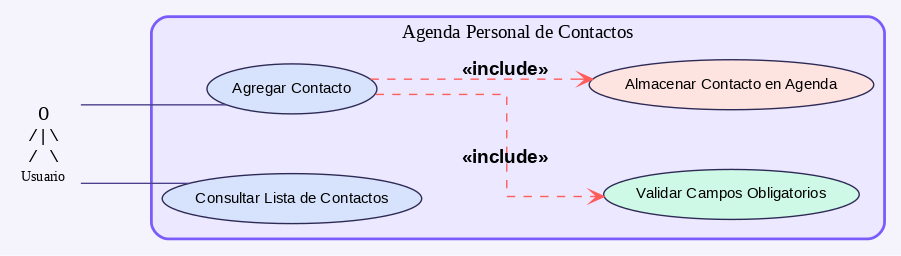

In [22]:
# @title
# Instalación de Graphviz (necesario en algunos entornos)
!apt-get install -y graphviz > /dev/null 2>&1
!pip install graphviz > /dev/null 2>&1

from graphviz import Digraph
from IPython.display import Image, display

# Crear el diagrama
dot = Digraph('CasosDeUsoAgenda', filename='uml_casos_uso_agenda_colores', format='png')

# Configuración general
dot.attr(
    rankdir='LR',
    bgcolor='#F5F4FD',
    splines='ortho',
    dpi='100',
    nodesep='0.6',
    ranksep='0.8'
)

# Actor Principal
stickman_html = '''<
<TABLE BORDER="0" CELLBORDER="0" CELLPADDING="0">
  <TR><TD ALIGN="CENTER"><FONT FACE="monospace" POINT-SIZE="14">O</FONT></TD></TR>
  <TR><TD ALIGN="CENTER"><FONT FACE="monospace" POINT-SIZE="12">/|\\</FONT></TD></TR>
  <TR><TD ALIGN="CENTER"><FONT FACE="monospace" POINT-SIZE="12">/ \\</FONT></TD></TR>
  <TR><TD ALIGN="CENTER"><FONT POINT-SIZE="10">Usuario</FONT></TD></TR>
</TABLE>>'''

dot.node('actor', stickman_html, shape='none')

# Casos de Uso
dot.attr('node',
          shape='ellipse',
          style='filled',
          fillcolor='#D7E3FC',
          color='#2D2A55',
          fontname='Helvetica',
          fontsize='11')

# Casos de Uso Principales
dot.node('cu_agregar', 'Agregar Contacto')
dot.node('cu_consultar', 'Consultar Lista de Contactos')

# Casos Auxiliares
dot.node('cu_validar', 'Validar Campos Obligatorios', fillcolor='#CFF9E7')
dot.node('cu_almacenar', 'Almacenar Contacto en Agenda', fillcolor='#FEE4E1')

# Contorno del Sistema (Boundary)
with dot.subgraph(name='cluster_system') as c:
    c.attr(
        style='rounded, filled',
        color='#7A5CFA',
        fillcolor='#ECE8FF',
        penwidth='2',
        label='Agenda Personal de Contactos'
    )

    c.node('cu_agregar')
    c.node('cu_consultar')
    c.node('cu_validar')
    c.node('cu_almacenar')

# Relaciones

# Asociación Actor → Casos de uso
dot.attr('edge', arrowhead='none', style='solid', color='#4A3F8A')
dot.edge('actor', 'cu_agregar')
dot.edge('actor', 'cu_consultar')

# Relaciones «include»
dot.attr(
    'edge',
    arrowhead='open',
    style='dashed',
    color='#FF5C5C',
    fontname='Helvetica-Bold',
    label='«include»'
)
dot.edge('cu_agregar', 'cu_validar')
dot.edge('cu_agregar', 'cu_almacenar')

# Render y mostrar
output_path = dot.render(cleanup=True)
display(Image(filename=output_path))


# Repositorio de Github